# 1. Data Processing

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/kaggle/input/renewable-energies/Data_for_UCI_named.csv'
data = pd.read_csv(file_path)

# Display dataset information
print(data.head())  # Preview the data
print(data.info())  # Check for missing values and data types
print(data.describe())  # Summary statistics

# Encode the target variable ('stabf') into binary: stable = 0, unstable = 1
data['stabf'] = data['stabf'].map({'stable': 0, 'unstable': 1})

# Drop non-predictive column 'p1'
data = data.drop(columns=['p1'])

# Separate features and target
X = data.drop(columns=['stab', 'stabf'])  # Drop 'stab' and 'stabf' for features
y = data['stabf']  # Target is 'stabf'

# Splitting the dataset into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Save processed data for later reference
print("Data split and scaled successfully!")


       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns

# 2. Data Visualization

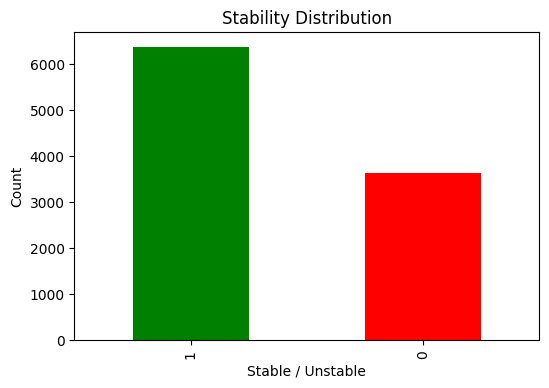

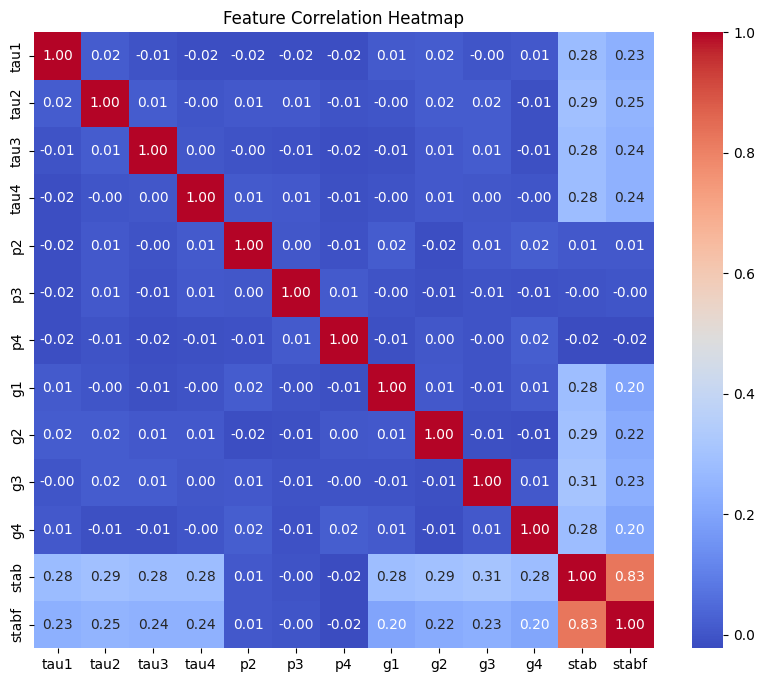

In [2]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
data['stabf'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Stability Distribution")
plt.xlabel("Stable / Unstable")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


# 3. Model Architecture

In [3]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

# 4. Training

In [4]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Save the trained model
model.save('grid_stability_model.h5')
print("Model saved as grid_stability_model.h5")


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6910 - loss: 0.5775 - val_accuracy: 0.8453 - val_loss: 0.3665
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8232 - loss: 0.3944 - val_accuracy: 0.8627 - val_loss: 0.3207
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8257 - loss: 0.3742 - val_accuracy: 0.8793 - val_loss: 0.2884
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8479 - loss: 0.3367 - val_accuracy: 0.8893 - val_loss: 0.2637
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8628 - loss: 0.3172 - val_accuracy: 0.8947 - val_loss: 0.2396
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8810 - loss: 0.2784 - val_accuracy: 0.9080 - val_loss: 0.2205
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8780 - loss: 0.2760 - val_accuracy: 0.9127 - val_loss: 0.2140
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8928 - loss: 0.2661 - val_accuracy: 0.

# 5. Visualizing Training Performance

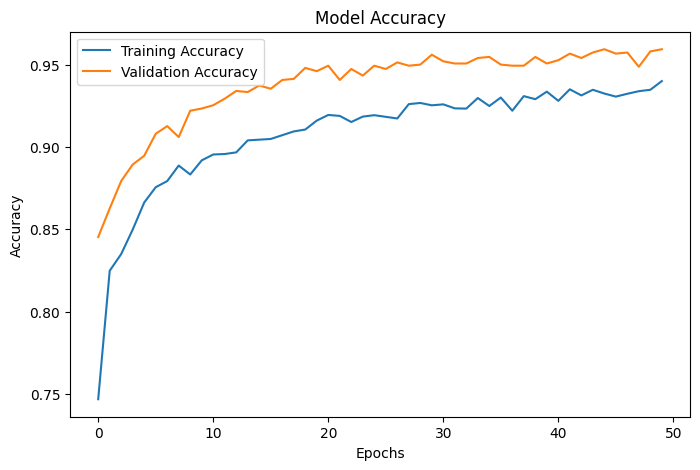

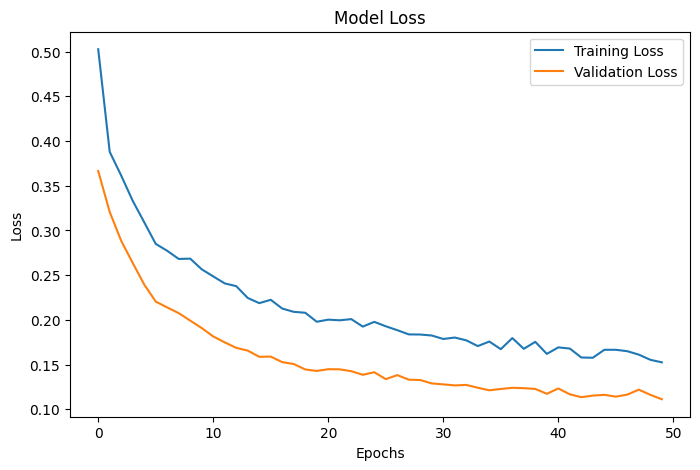

In [5]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# 6. Testing

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.1141
Test Accuracy: 0.9593


In [7]:
# Load the saved model
loaded_model = tf.keras.models.load_model('grid_stability_model.h5')

# Perform inference on a few test samples
sample_data = X_test_scaled[:5]  # Take the first 5 test samples
predictions = (loaded_model.predict(sample_data) > 0.5).astype(int)

print("Sample Predictions:", predictions.ravel())
print("Actual Values:", y_test.iloc[:5].values)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Sample Predictions: [1 1 0 1 0]
Actual Values: [1 1 1 1 0]


In [14]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Load the trained model
model = tf.keras.models.load_model('grid_stability_model.h5')

# Define a sample input for prediction
input_data = np.array([[-3.0, -3.0, -8.0, -9.0, -1.0, -1.5, -1.3, -0.5, -0.6, -0.7, -0.8]])

# Scale the input (same as used during training)
scaler = StandardScaler()
input_scaled = scaler.fit_transform(input_data)

# Perform inference
prediction = (model.predict(input_scaled) > 0.5).astype(int)

# Interpret the result
result = "Stable" if prediction[0][0] == 0 else "Unstable"
print(f"Prediction: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediction: Unstable
